In [1]:
from modelo_tweets import *
import itertools

In /u01/user8/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /u01/user8/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /u01/user8/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /u01/user8/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /u01/user8/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-d

In [2]:
with open('errors_covariados2.pickle', 'rb') as f:
    x = pickle.load(f)

In [ ]:
values=[]
for idx,period in enumerate(x):
    for comb in [(1,2,3,4,5),(1,2,3,5)]:
        values.append([comb,str(idx/2+1),x[period][0][comb]['MAE']])
Data=pd.DataFrame(values,columns=['Comb','Months','MAE'])    

In [ ]:
sns.lineplot(data=Data,x='Months',y='MAE',hue='Comb')

In [26]:
with open('errors_times.pickle', 'rb') as f:
    x = pickle.load(f)

In [56]:
values=[]
for idx,period in enumerate(x):
    for days in x[period][0]:
        values.append([idx,days,x[period][0][days]['MAE']])
Data=pd.DataFrame(values,columns=['Period','Days','MAE'])   
Data=Data.groupby('Days').agg({'MAE':['mean','std']}).reset_index()
Data=Data.sort_values(('MAE','mean'))

In [57]:
Data

Days            MAE               
                  mean            std
2     6     148.051164     110.164770
3     8     152.873233     110.460010
0     2     156.275112     114.868858
4    10     157.893830     110.467919
1     4     158.160068     126.889180
5    12     159.242788     117.886851
13   28    2185.056620    5741.313812
12   26    2352.358266    6201.899407
10   22    2773.963546    7392.702592
8    18    3396.544795    9145.837079
6    14   68233.878119  192516.085870
11   24   71111.318427  200682.317380
9    20   86012.867582  242819.127009
7    16  108002.640466  305040.407970

<AxesSubplot:xlabel="('MAE', 'mean')", ylabel="('Days', '')">

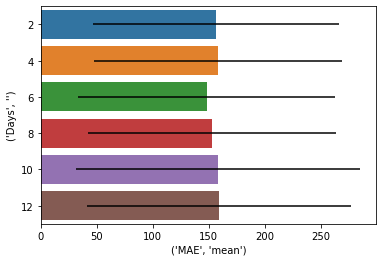

In [60]:
sns.barplot(data=Data.head(6),y=('Days',''),x=('MAE','mean'),orient='h',
            xerr=Data.head(6)[('MAE','std')].values
           )